## Assignment 3
### Group Members: Yannick Heard, Timothy Lai, Christine Mulcahy, Daniel Quijano, Elena Reynolds

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

scores = pd.read_csv('Assignment 3 Sentiment Scores.csv')
scores.head()

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4.0,3.0,NaN,NaN,NaN,5.0,2.0,1.0
1,NaN,NaN,3.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN
2,NaN,4.0,NaN,NaN,NaN,3.0,NaN,3.0,NaN,3.0
3,NaN,2.0,NaN,2.0,NaN,NaN,NaN,2.0,4.0,2.0
4,NaN,3.0,3.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0


In [2]:
models = scores.columns.tolist()
models

['ES', 'LS', 'RX', 'A8', 'A6', '3series', '5series', '7series', 'XJ', 'Sclass']

In [4]:
edge_list = []

def get_edges():
    for model1 in models:
        for model2 in models[models.index(model1)+1:]:
            pos_sent = []
            neg_sent = []
            for i in range(0,len(scores)):
                sent_model1 = scores[model1][i]
                sent_model2 = scores[model2][i]
                if (not(np.isnan(sent_model1)) & (not(np.isnan(sent_model2)))):
                    edge_weight = sent_model1 - sent_model2
                    if edge_weight >= 0:
                        pos_sent.append(edge_weight)
                    elif edge_weight < 0:
                        neg_sent.append(edge_weight)
            if len(pos_sent) > 0:
                edge_list.append([model1, model2, np.mean(pos_sent)])
            if len(neg_sent) > 0:
                edge_list.append([model2, model1, abs(np.mean(neg_sent))])
    return edge_list

get_edges()

[['ES', 'LS', 0.30434782608695654],
 ['LS', 'ES', 2.0],
 ['ES', 'RX', 0.83333333333333337],
 ['RX', 'ES', 2.0],
 ['ES', 'A8', 2.8333333333333335],
 ['A8', 'ES', 3.0],
 ['ES', 'A6', 6.0],
 ['A6', 'ES', 1.6666666666666667],
 ['ES', '3series', 3.25],
 ['3series', 'ES', 6.0],
 ['ES', '5series', 4.0],
 ['5series', 'ES', 5.0],
 ['ES', '7series', 3.0],
 ['7series', 'ES', 2.7999999999999998],
 ['ES', 'XJ', 0.5],
 ['XJ', 'ES', 1.0],
 ['ES', 'Sclass', 3.2857142857142856],
 ['Sclass', 'ES', 2.6153846153846154],
 ['LS', 'RX', 1.0],
 ['RX', 'LS', 1.1428571428571428],
 ['LS', 'A8', 2.3529411764705883],
 ['A8', 'LS', 2.8378378378378377],
 ['LS', 'A6', 2.7272727272727271],
 ['A6', 'LS', 1.2857142857142858],
 ['LS', '3series', 2.3333333333333335],
 ['3series', 'LS', 4.0],
 ['LS', '5series', 2.4545454545454546],
 ['5series', 'LS', 3.1000000000000001],
 ['LS', '7series', 2.1142857142857143],
 ['7series', 'LS', 2.75],
 ['LS', 'XJ', 2.0],
 ['XJ', 'LS', 2.8888888888888888],
 ['LS', 'Sclass', 2.1477272727272

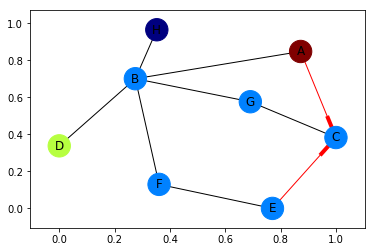

In [5]:
G = nx.DiGraph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5714285714285714,
           'H': 0.0}

values = [val_map.get(node, 0.25) for node in G.nodes()]

# Specify the edges you want here
red_edges = [('A', 'C'), ('E', 'C')]
edge_colours = ['black' if not edge in red_edges else 'red'
                for edge in G.edges()]
black_edges = [edge for edge in G.edges() if edge not in red_edges]

# Need to create a layout when doing
# separate calls to draw nodes and edges
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=red_edges, edge_color='r', arrows=True)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
plt.show()